In [1]:
# NOTEBOOK IMPORTS
import os, glob, zipfile, warnings
import numpy as np
from tqdm.notebook import tqdm
from shutil import copyfile, rmtree
from datetime import datetime

# IMAGE IMPORTS
from PIL import Image

# GIS IMPORTS
from affine import Affine
from shapely.geometry import  MultiPolygon
import pandas as pd
import geopandas as gpd
from scipy.spatial import cKDTree

# PLOTTING IMPORTS
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines

# CUSTOM UTILITIES

from IndexUtils import * 
from TPNN import *
# from FindGrid import *

# from WorldFileUtils import *
# from GeometryUtils import *
# from icp import *
# from DataUtils import *
# from FindGrid import *
# from PlottingUtils import *
# from affinetransformation import *

Image.MAX_IMAGE_PIXELS = 933120000
warnings.filterwarnings("ignore")

IO directories depending on which machine. 

In [2]:
username = os.getlogin()

if username == 'fhacesga':
    base_input_path   = r"D:\FloodChange\AAA_HistoricalDownload"
    base_output_path  = r"C:\Users\\"+username+"\Desktop\FIRMsDigitizing\processing"
    ref_dir  = r"C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data\AAA_ReferenceDatasets\\"
elif username == 'fhace':
    ref_dir = r"C:\Users\fhace\OneDrive - University Of Houston\AAA_RECTDNN\data\AAA_ReferenceDatasets\\"
else:
    base_input_path   = r"D:\Desktop\FIRMsDigitizing\data\HistoricalFIRMS"
    base_output_path  = r"D:\Desktop\FIRMsDigitizing\processing"
    ref_dir  = r"C:\Users\franc\OneDrive - University Of Houston\AAA_RECTDNN\data\AAA_ReferenceDatasets\\"

init_databases(ref_dir)

Create working dir and unzip all files if needed

In [3]:
proc_dir = None
proc_dir = r"C:\Users\fhacesga\Desktop\FIRMsDigitizing\processing\2023-10-20_11-05-37\\"

if proc_dir is None:
    datetime_str = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    proc_dir     = os.path.join(base_output_path, datetime_str)
    unzipped_dir = os.path.join(proc_dir, "Inputs")
    outputs_dir  = os.path.join(proc_dir, "Outputs")
    print(proc_dir)
    os.makedirs(proc_dir)
    os.makedirs(unzipped_dir)
    os.makedirs(outputs_dir)
    extractZipFiles(base_input_path, unzipped_dir)
else:
    unzipped_dir = os.path.join(proc_dir, "Inputs")
    outputs_dir  = os.path.join(proc_dir, "Outputs")
    rmtree(outputs_dir)
    os.makedirs(outputs_dir)

Here we're using heuristics to identify indices within all the image files. These include:
- Files that are shorter than 12 characters
- Files that have the ```IND``` marker

We create a Pandas DataFrame with the files matching. We then add several fields as below

In [4]:
# LIST ALL IMAGES IN DIRECTORY
image_files = glob.glob(f"{unzipped_dir}/*")

# FILTER IMAGES USING HEURISTICS
patterns = ["IND", "_1."]
index_files = [file for pattern in patterns for file in glob.glob(unzipped_dir + "\\*" + pattern + "*")]
filtered_files = [file for file in image_files if len(os.path.basename(file)) < 12]
index_files.extend(filtered_files)

# CREATE DATAFRAME
index_files = pd.DataFrame(index_files, columns=["FilePath"])

# INDEX ATTRIBUTES TO BE ADDED
index_files["Basename"] = [os.path.basename(file) for file in index_files["FilePath"].to_list()]    # BASENAME
index_files["Location"] = index_files["Basename"].apply(extract_numerical_chars).astype(np.int32)   # 
index_files["GEOID"]    = index_files["Location"].apply(getGEOID)       # GET GEOID FOR EACH INDEX
index_files["geometry"] = index_files["GEOID"].apply(getGeometry)       # GET GEOMETRY FROM MATCHING GEOIDs

In [5]:
def find_bbox_yolo(mydict):
    mylist = []
    for i, (k, v) in enumerate(mydict.items()):
        # print(k, v)
        mylist.append(v["bbox"])

    mylist = np.array(mylist)

    return np.array([np.min(mylist[:, 0]), np.min(mylist[:, 1]), np.max(mylist[:, 2]), np.max(mylist[:, 3])])

C:\Users\fhacesga\Desktop\FIRMsDigitizing\processing\2023-10-20_11-05-37\\Inputs\480233IND0_0382.jpg


  0%|          | 0/2 [00:00<?, ?it/s]


image 1/1 C:\Users\fhacesga\Desktop\FIRMsDigitizing\processing\2023-10-20_11-05-37\Inputs\480233IND0_0382.jpg: 1024x1024 4 tiles, 1 county, 979.7ms
Speed: 17.6ms preprocess, 979.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)
Assigning Points


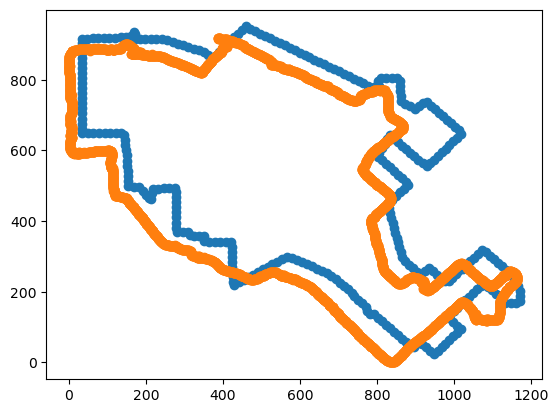

  0%|          | 0/325 [00:00<?, ?it/s]

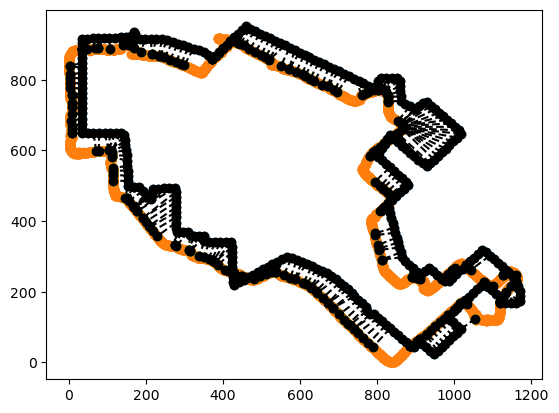

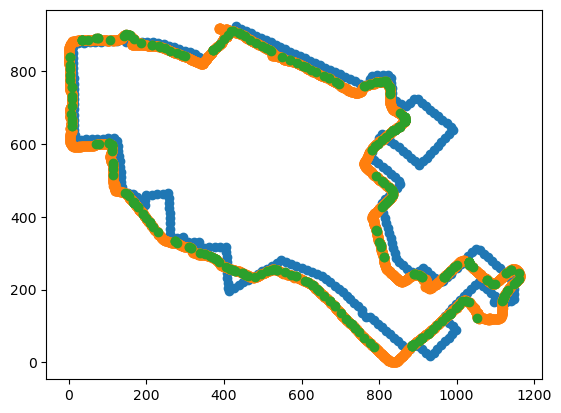

  0%|          | 0/325 [00:00<?, ?it/s]

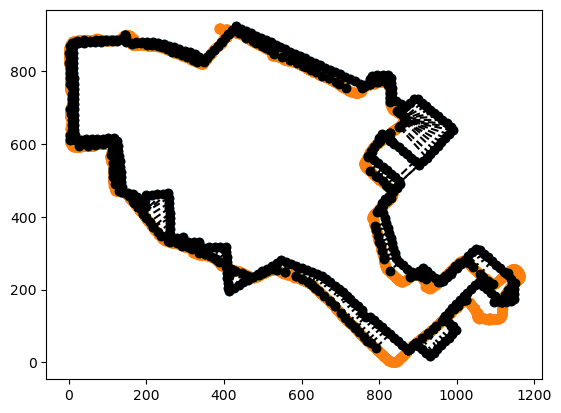

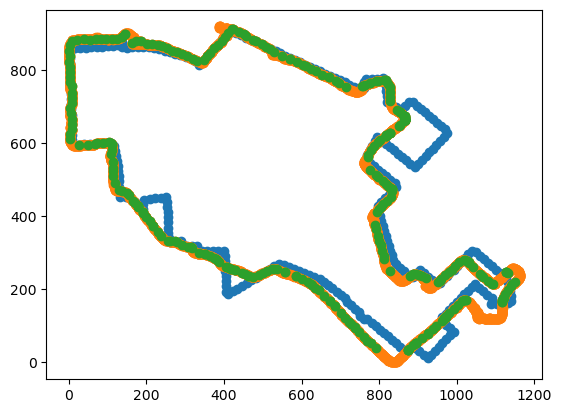

  0%|          | 0/325 [00:00<?, ?it/s]

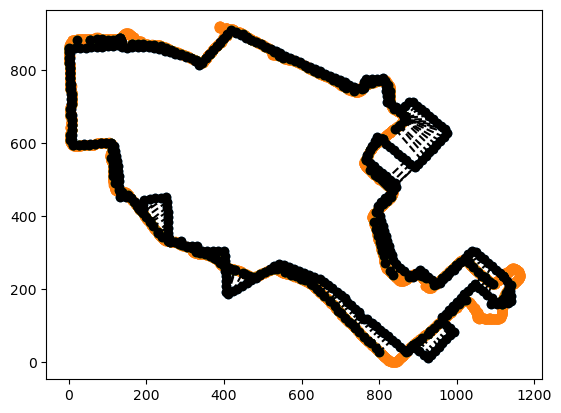

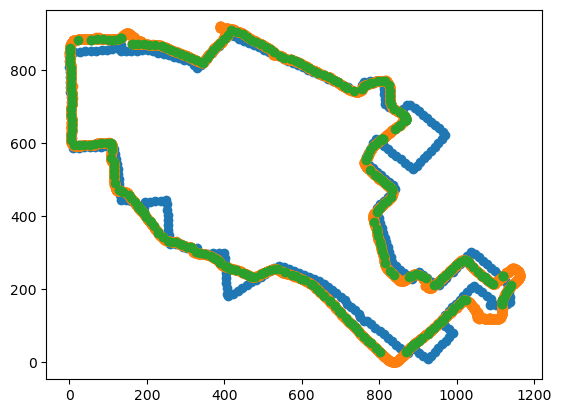

  0%|          | 0/325 [00:00<?, ?it/s]

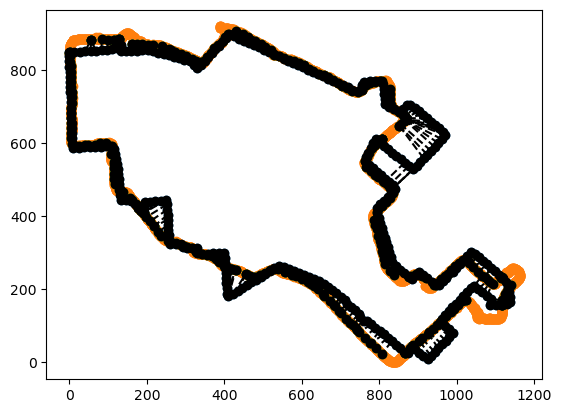

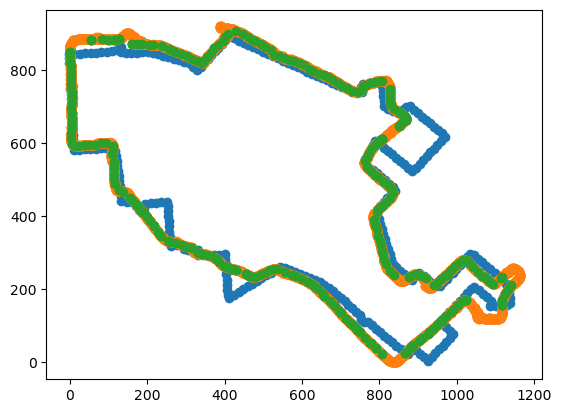

  0%|          | 0/325 [00:00<?, ?it/s]

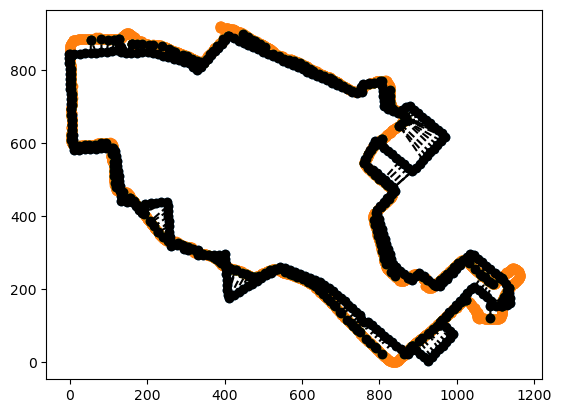

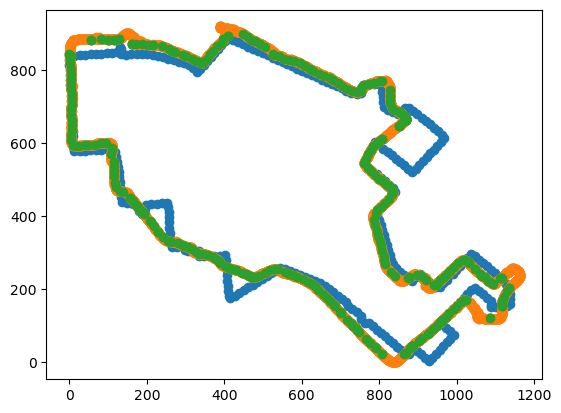

  0%|          | 0/325 [00:00<?, ?it/s]

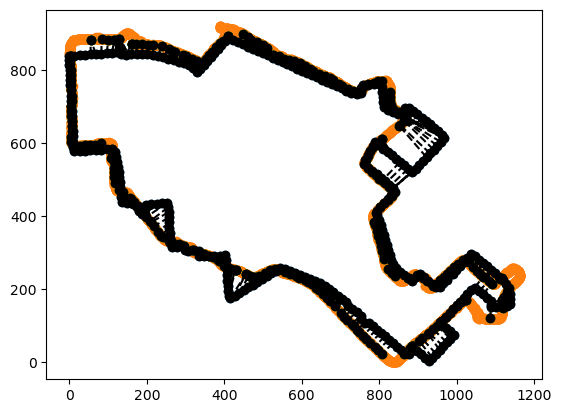

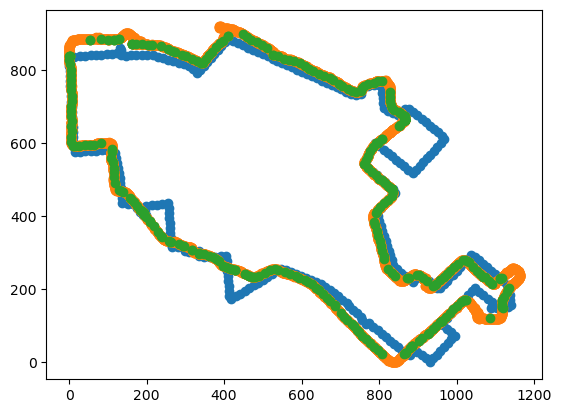

  0%|          | 0/325 [00:00<?, ?it/s]

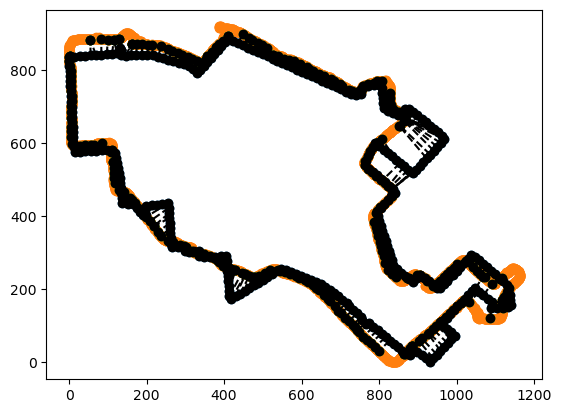

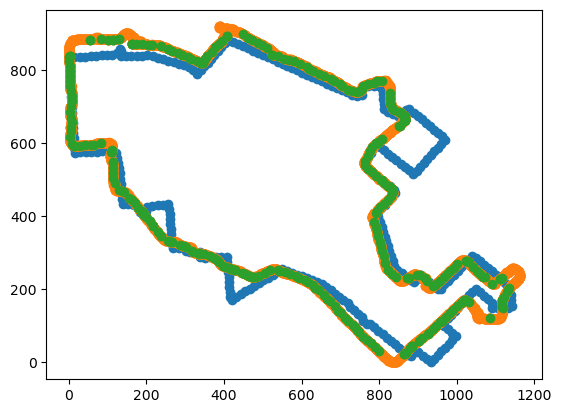

  0%|          | 0/325 [00:00<?, ?it/s]

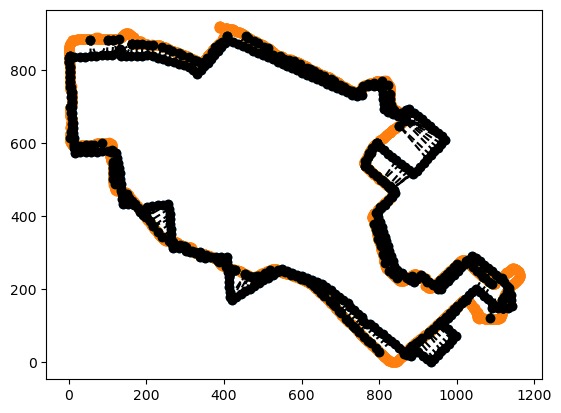

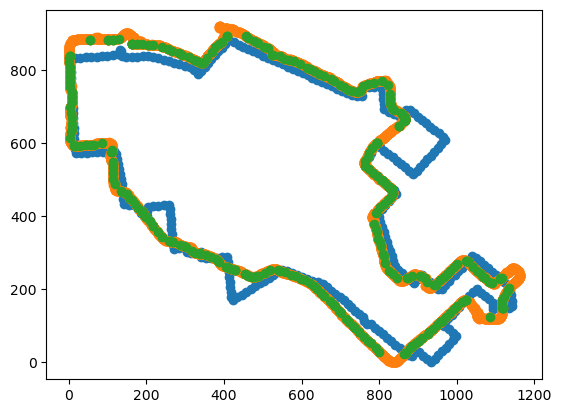

  0%|          | 0/325 [00:00<?, ?it/s]

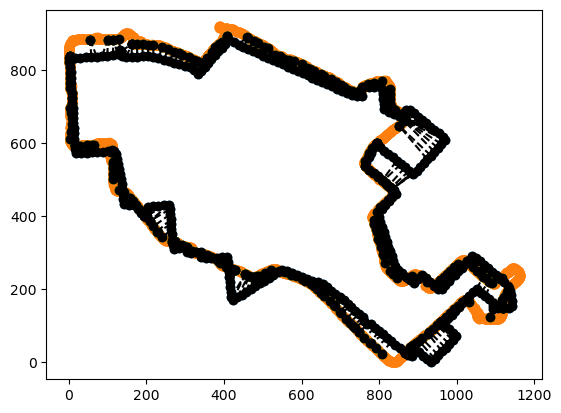

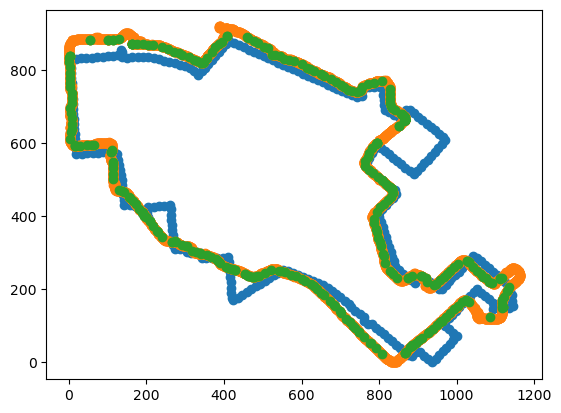

  0%|          | 0/325 [00:00<?, ?it/s]

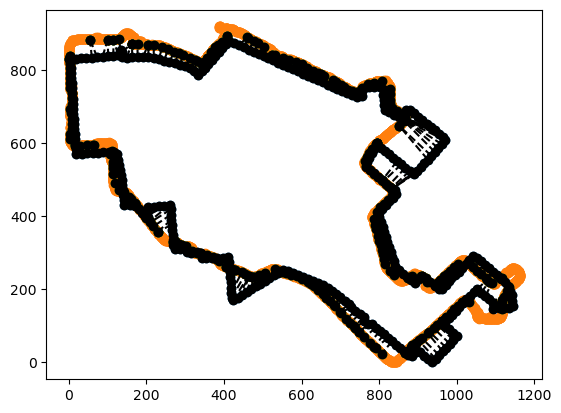

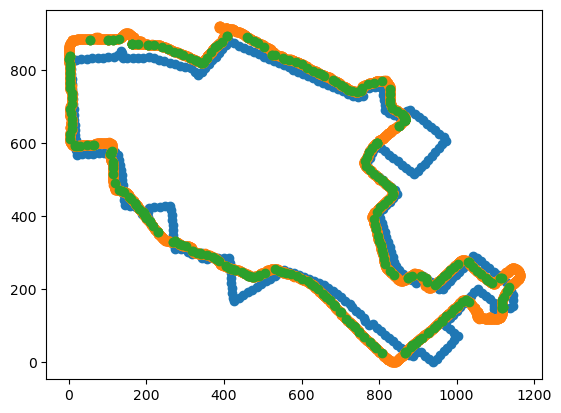

  0%|          | 0/325 [00:00<?, ?it/s]

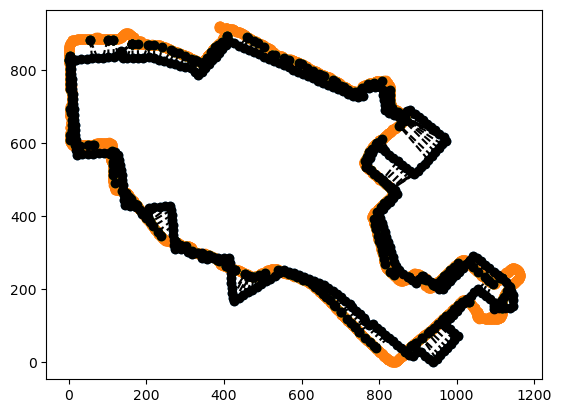

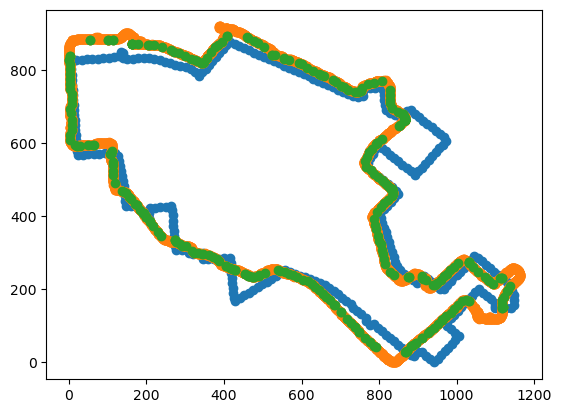

  0%|          | 0/325 [00:00<?, ?it/s]

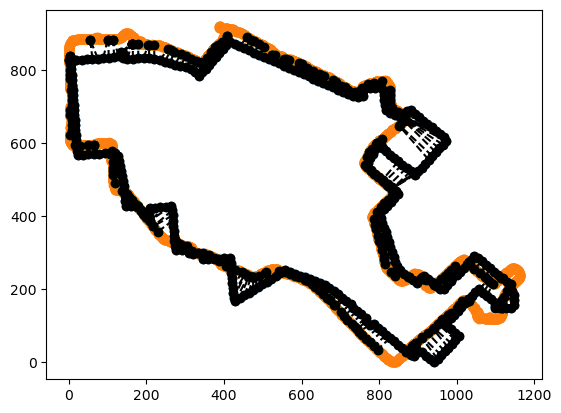

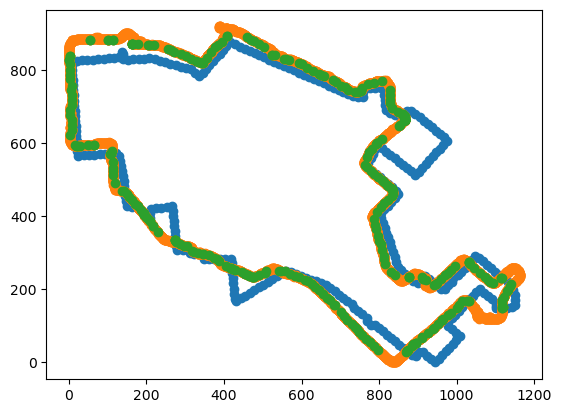

  0%|          | 0/325 [00:00<?, ?it/s]

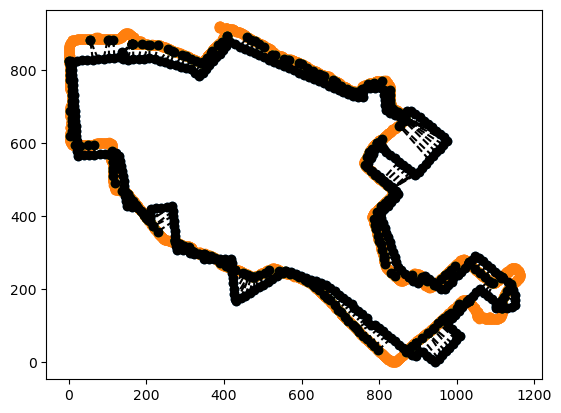

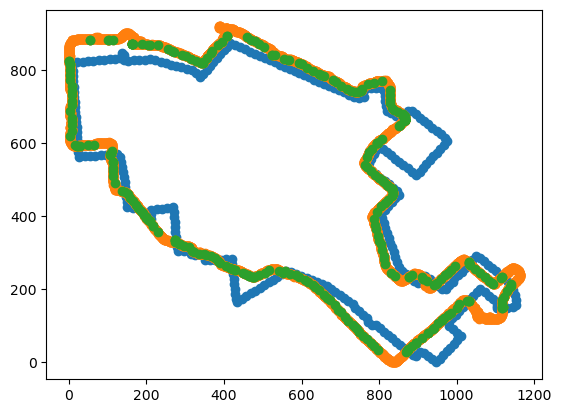

  0%|          | 0/325 [00:00<?, ?it/s]

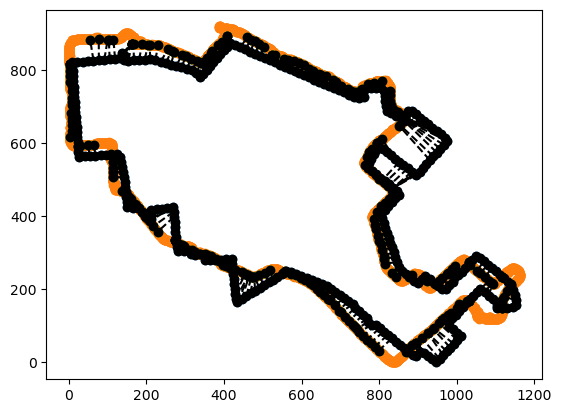

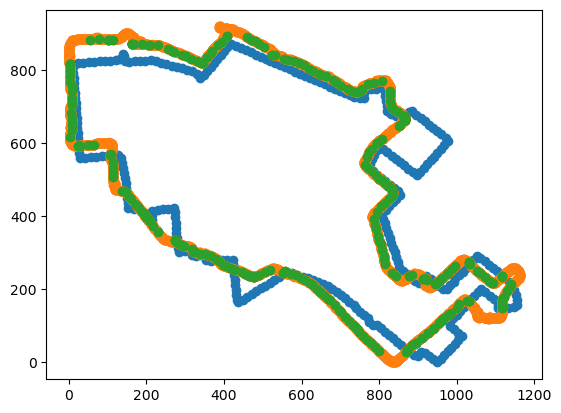

  0%|          | 0/325 [00:00<?, ?it/s]

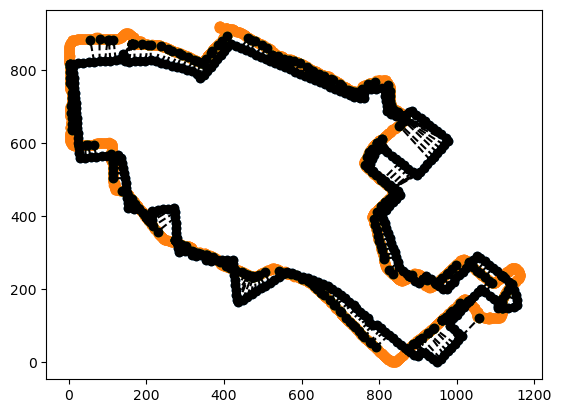

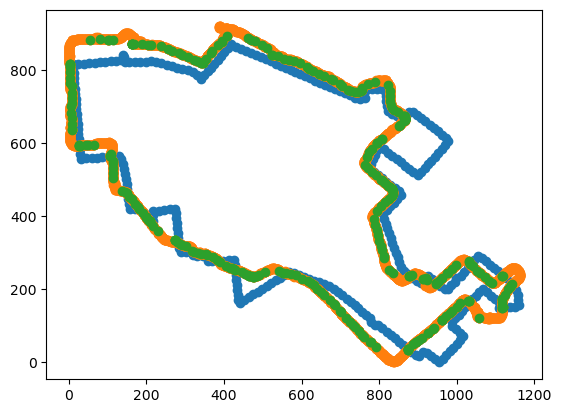

  0%|          | 0/325 [00:00<?, ?it/s]

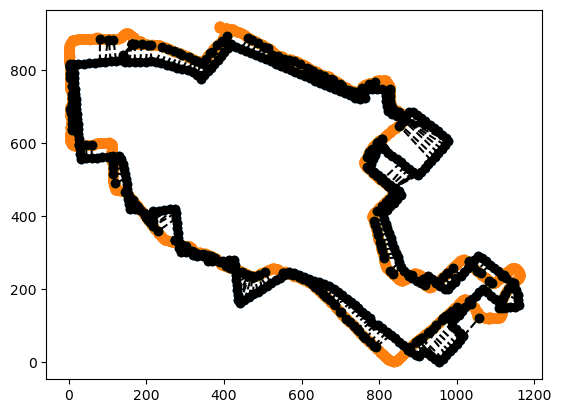

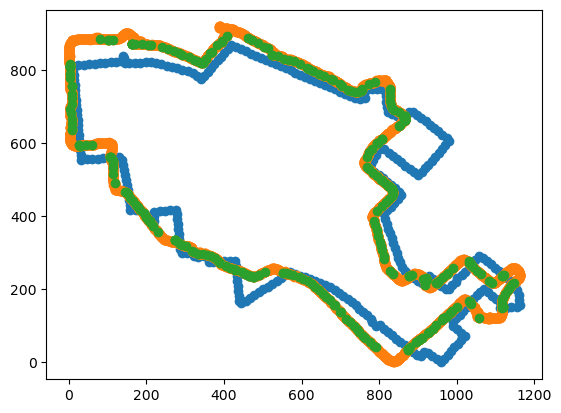

  0%|          | 0/325 [00:00<?, ?it/s]

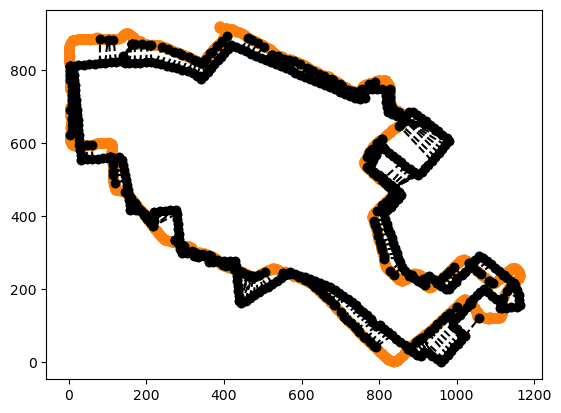

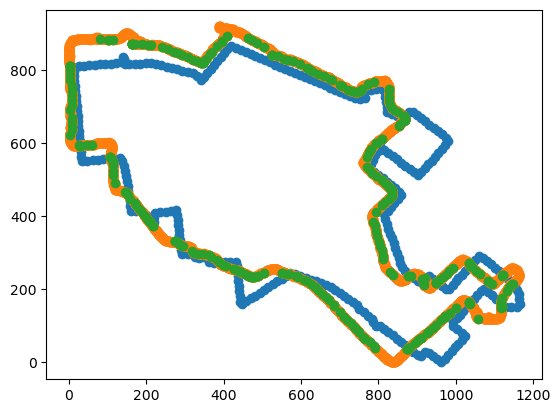

  0%|          | 0/325 [00:00<?, ?it/s]

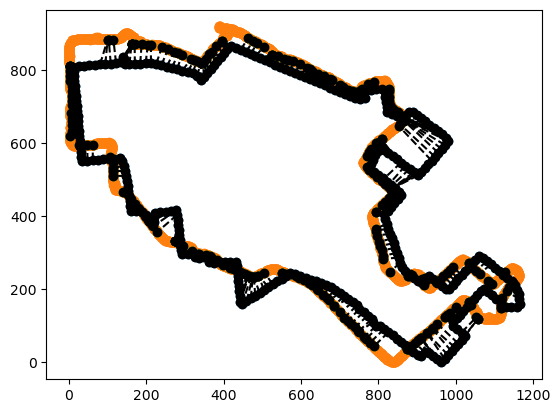

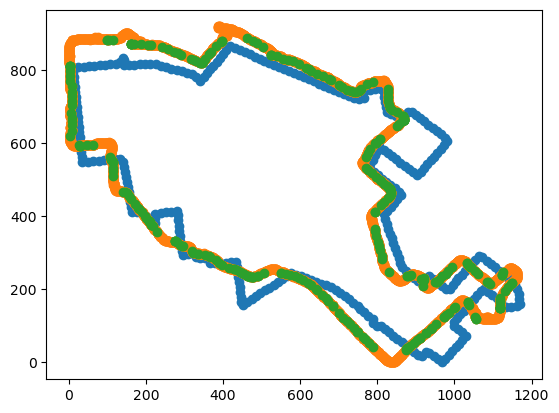

  0%|          | 0/325 [00:00<?, ?it/s]

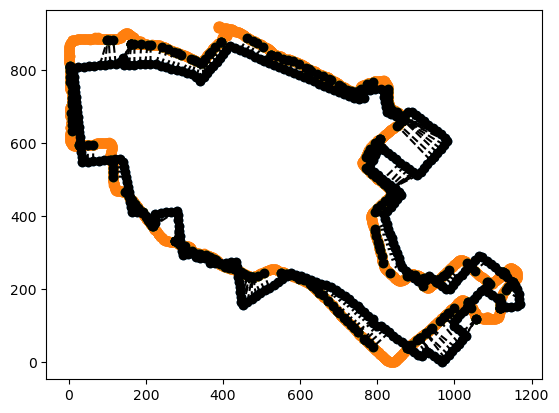

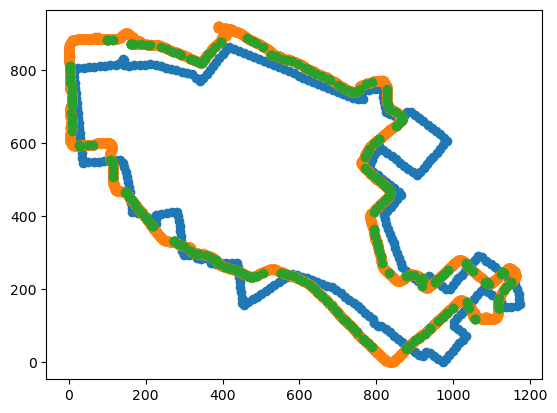

  0%|          | 0/325 [00:00<?, ?it/s]

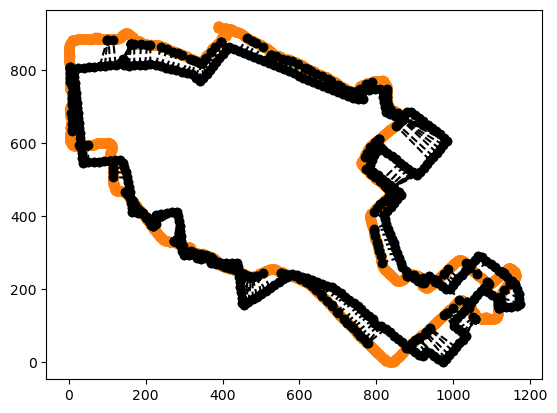

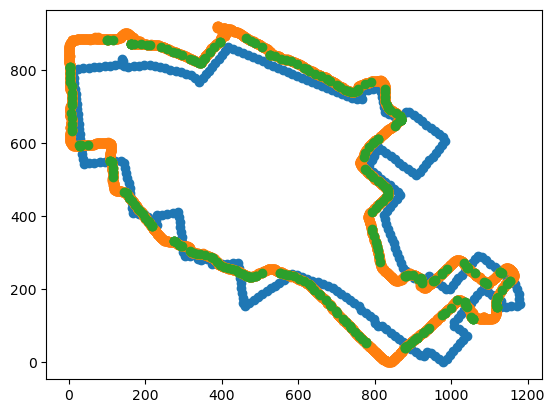

  0%|          | 0/325 [00:00<?, ?it/s]

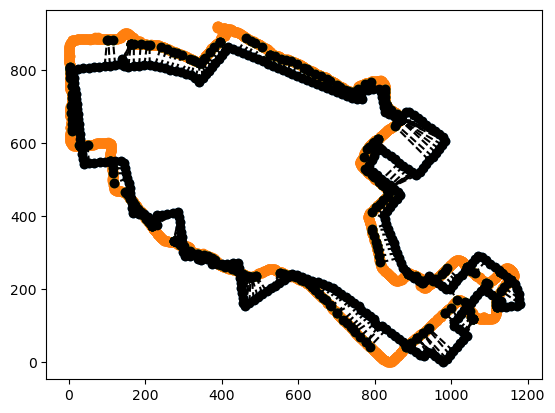

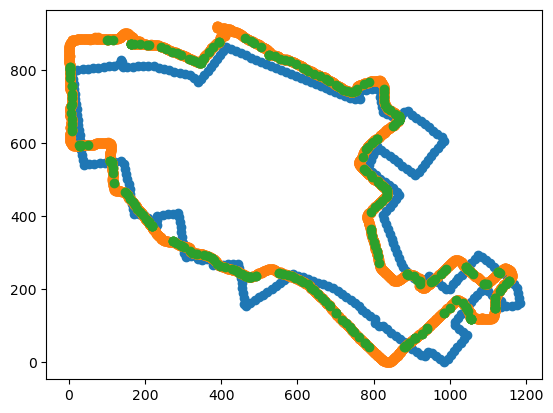

  0%|          | 0/325 [00:00<?, ?it/s]

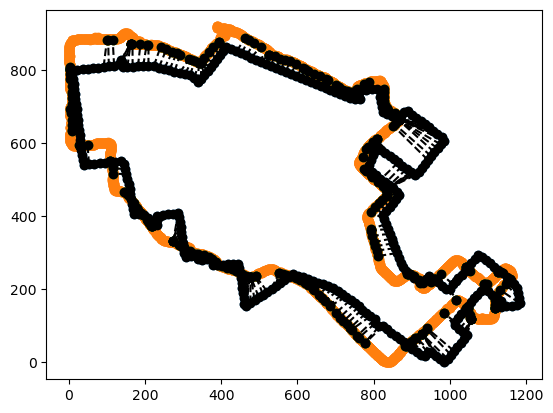

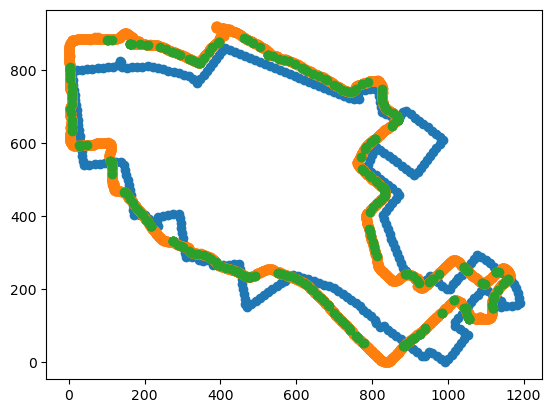

  0%|          | 0/325 [00:00<?, ?it/s]

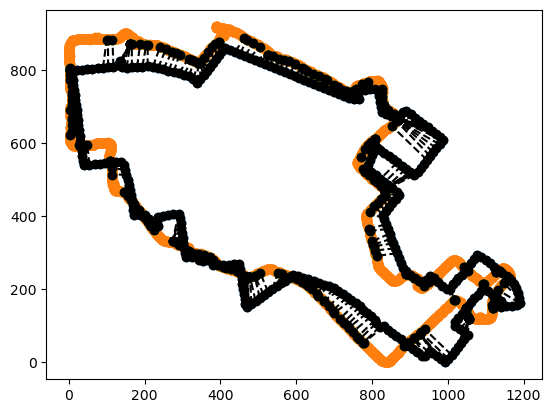

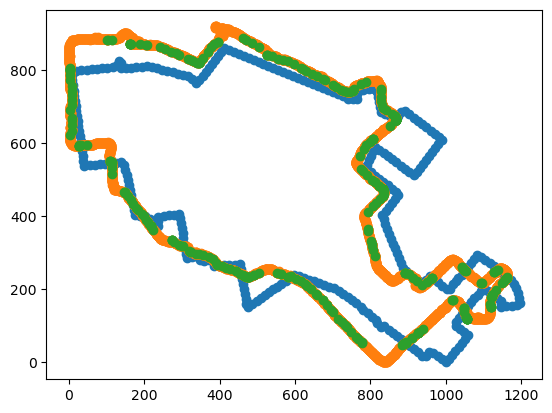

  0%|          | 0/325 [00:00<?, ?it/s]

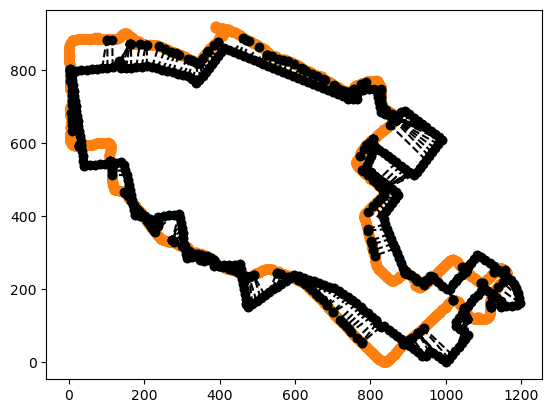

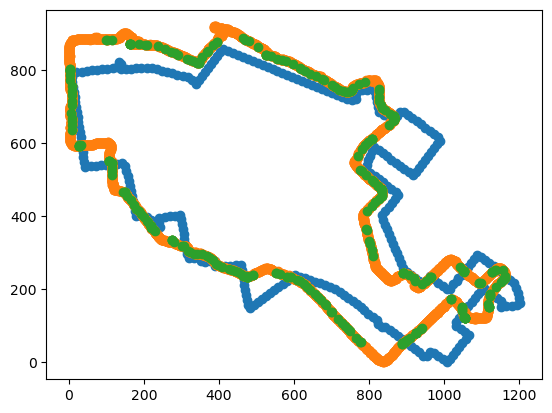

  0%|          | 0/325 [00:00<?, ?it/s]

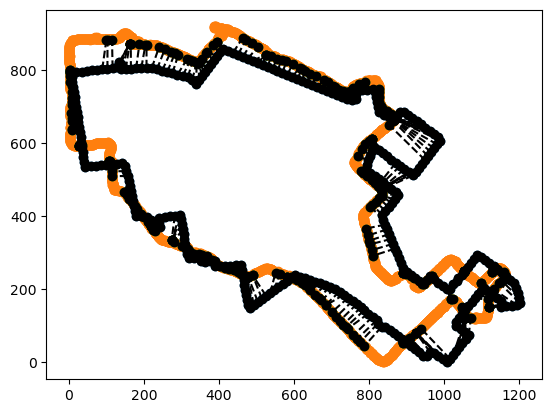

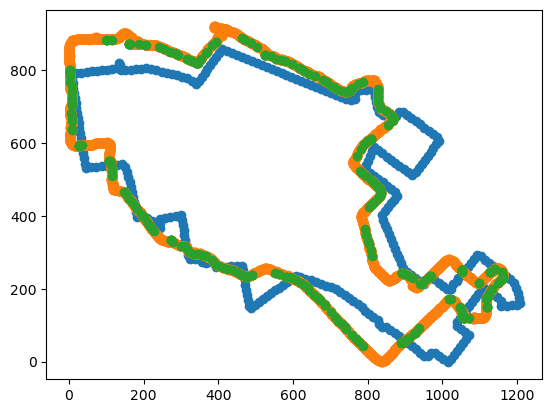

  0%|          | 0/325 [00:00<?, ?it/s]

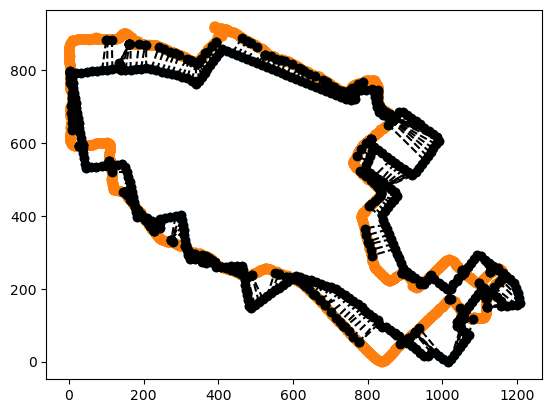

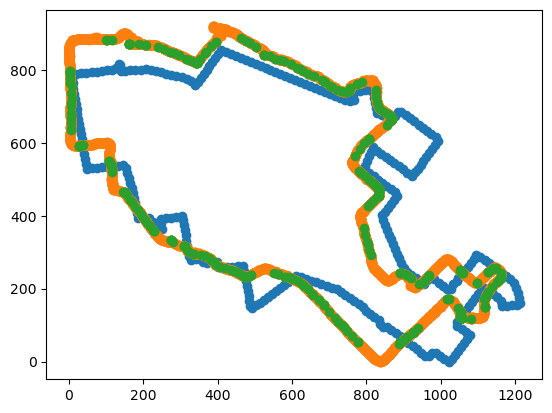

  0%|          | 0/325 [00:00<?, ?it/s]

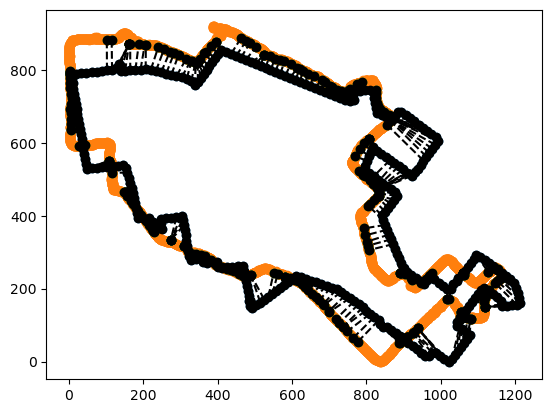

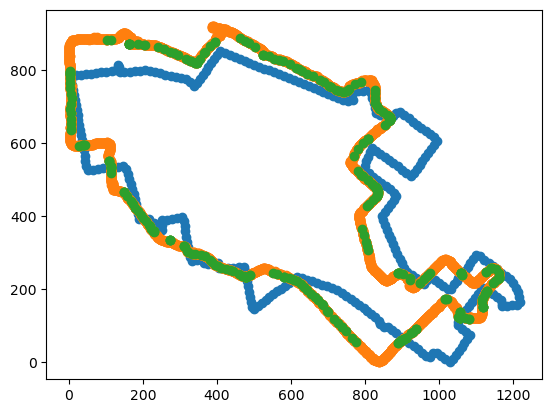

  0%|          | 0/325 [00:00<?, ?it/s]

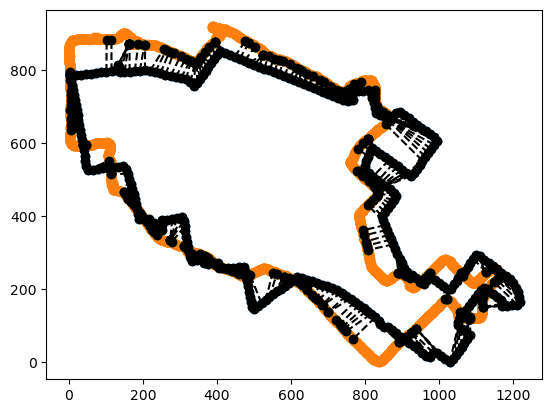

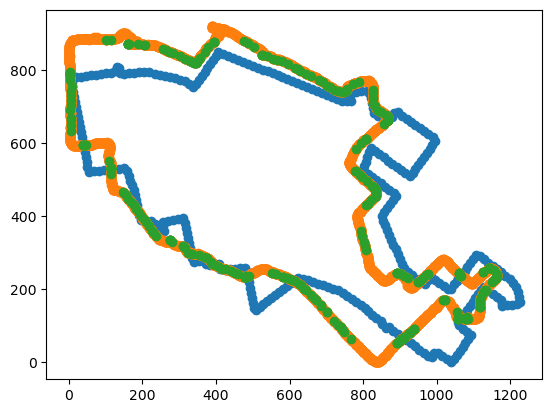

  0%|          | 0/325 [00:00<?, ?it/s]

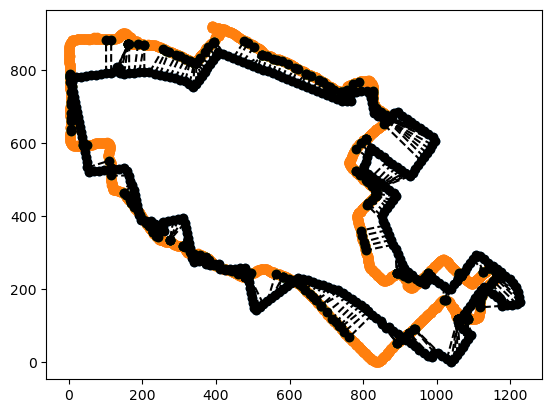

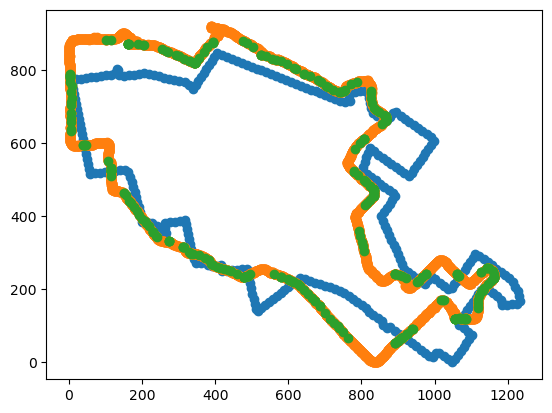

  0%|          | 0/325 [00:00<?, ?it/s]

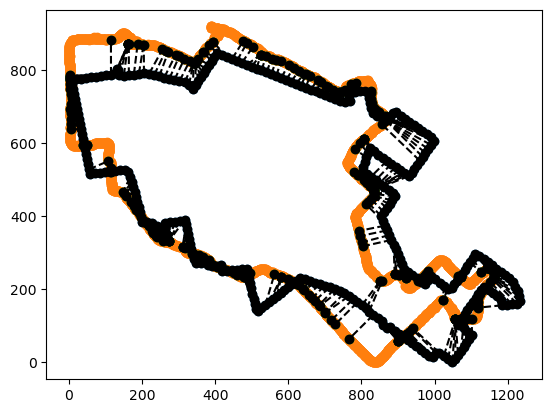

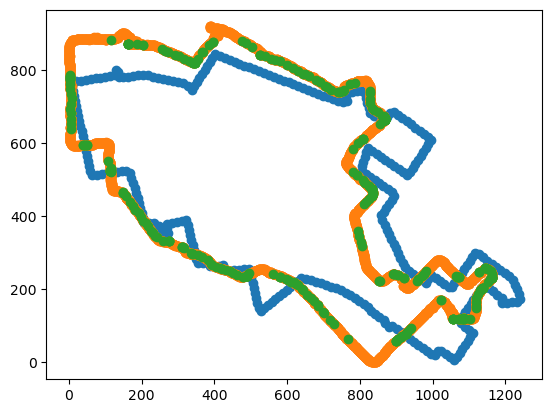

  0%|          | 0/325 [00:00<?, ?it/s]

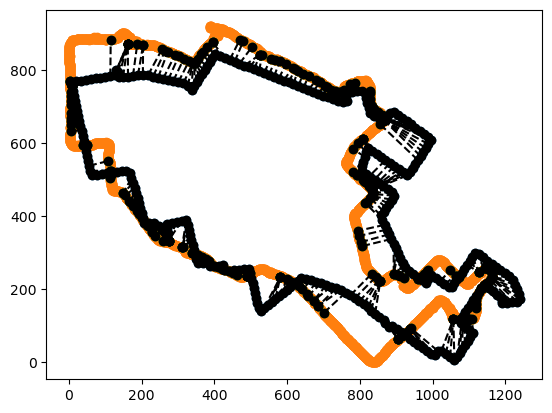

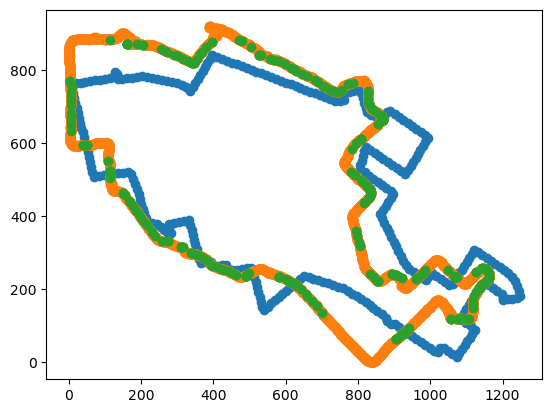

  0%|          | 0/325 [00:00<?, ?it/s]

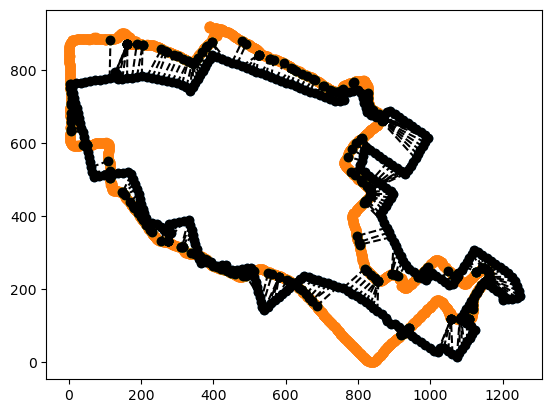

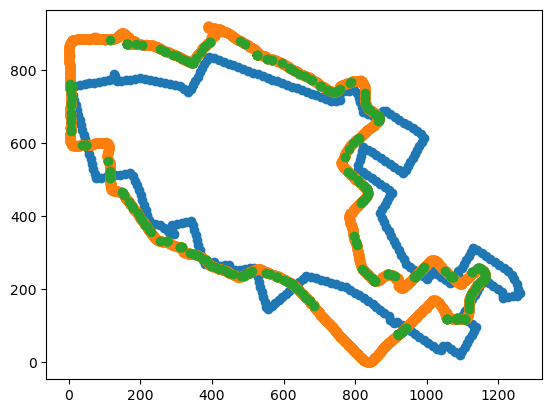

  0%|          | 0/325 [00:00<?, ?it/s]

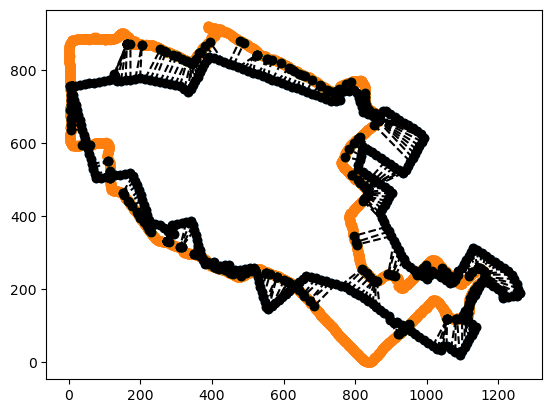

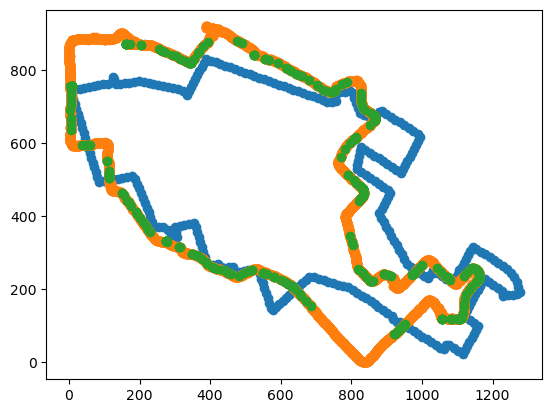

  0%|          | 0/325 [00:00<?, ?it/s]

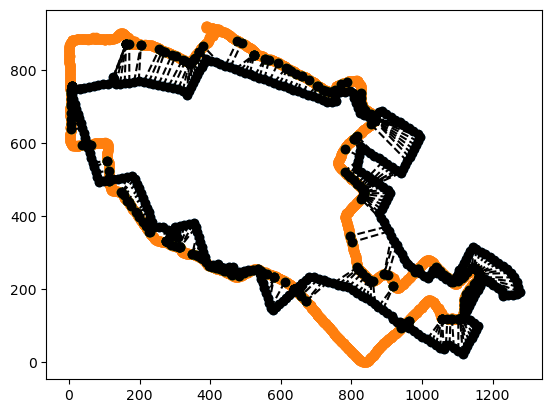

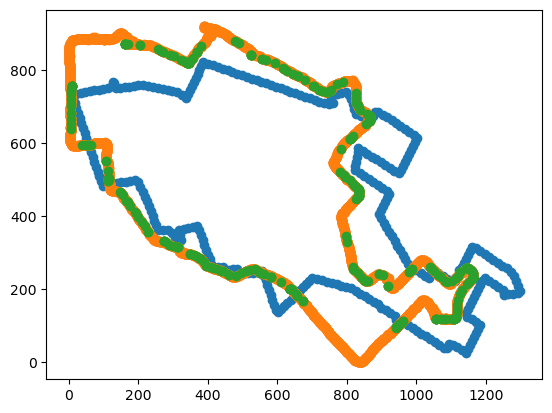

  0%|          | 0/325 [00:00<?, ?it/s]

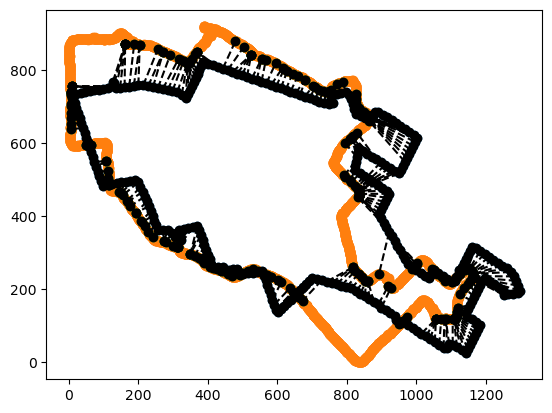

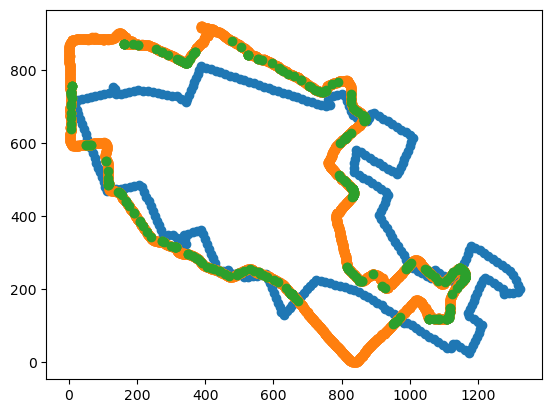

  0%|          | 0/325 [00:00<?, ?it/s]

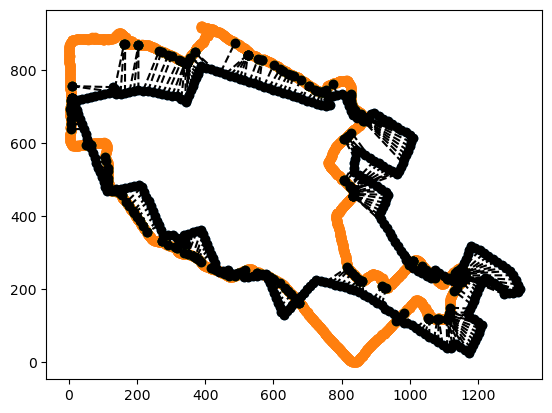

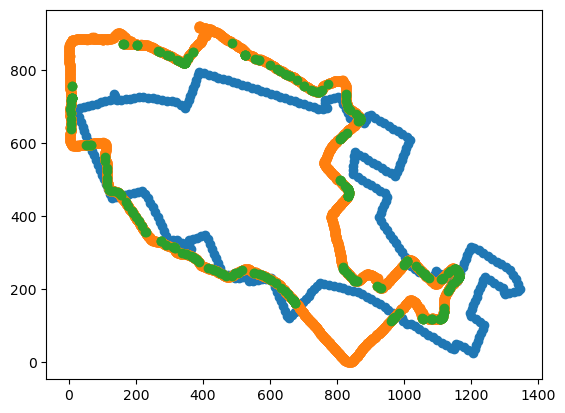

  0%|          | 0/325 [00:00<?, ?it/s]

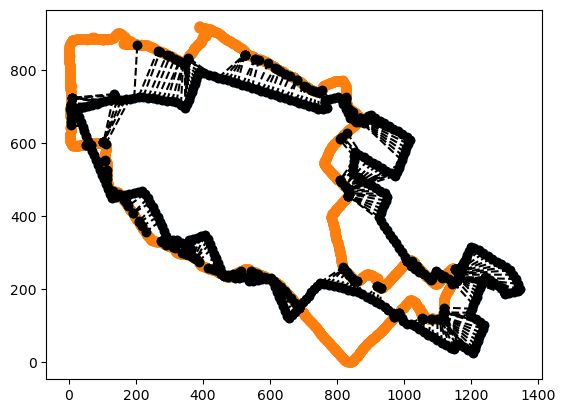

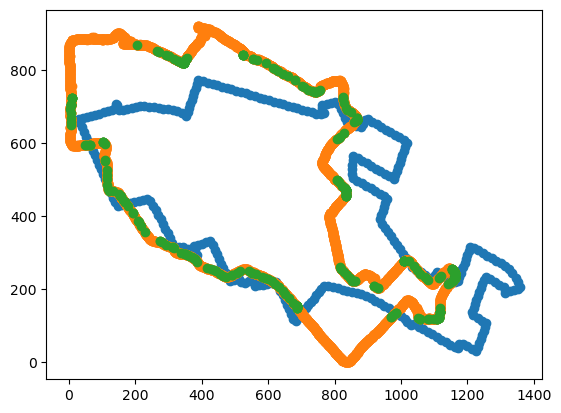

  0%|          | 0/325 [00:00<?, ?it/s]

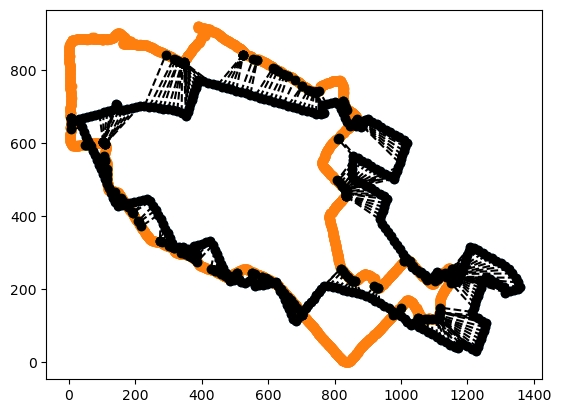

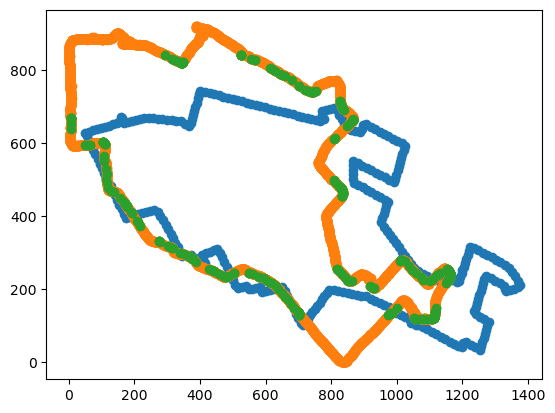

  0%|          | 0/325 [00:00<?, ?it/s]

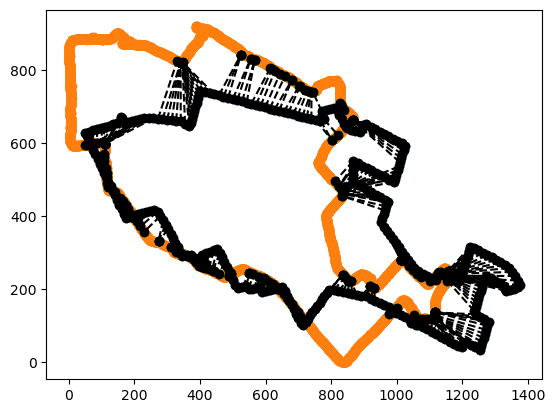

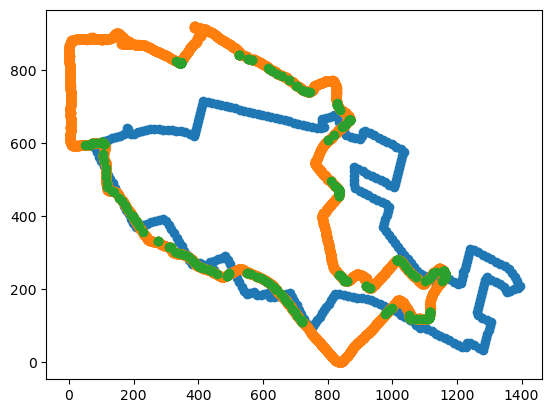

  0%|          | 0/325 [00:00<?, ?it/s]

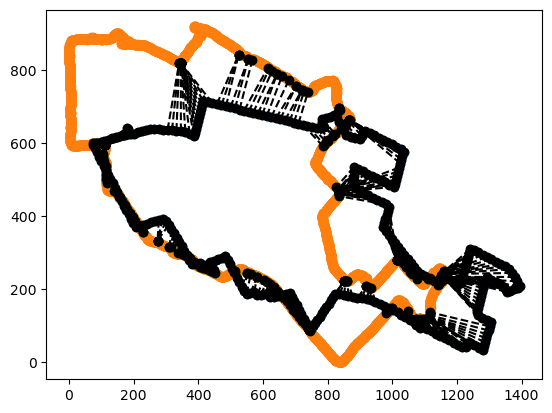

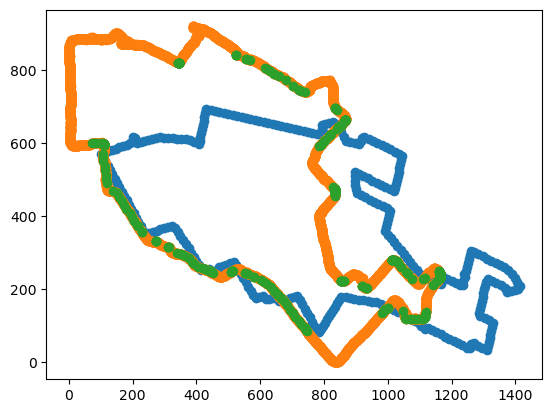

  0%|          | 0/325 [00:00<?, ?it/s]

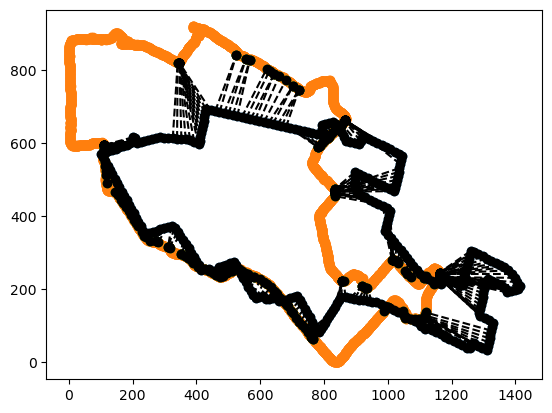

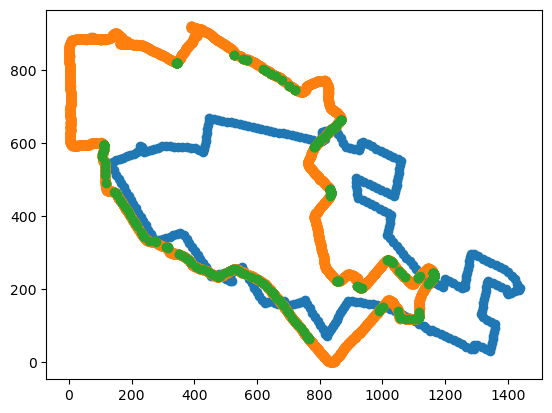

  0%|          | 0/325 [00:00<?, ?it/s]

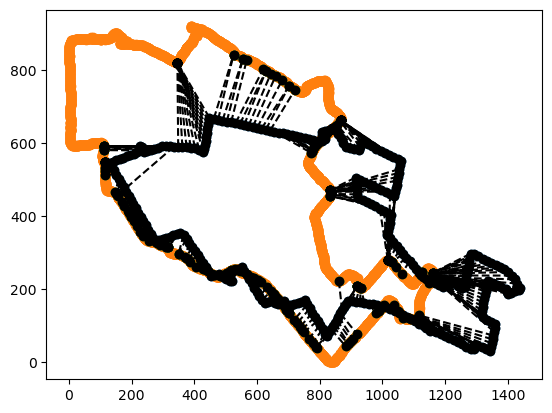

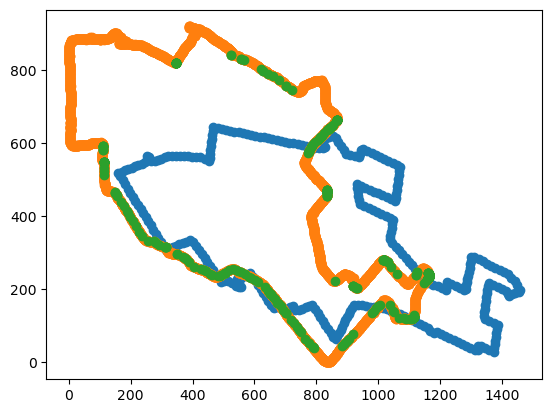

  0%|          | 0/325 [00:00<?, ?it/s]

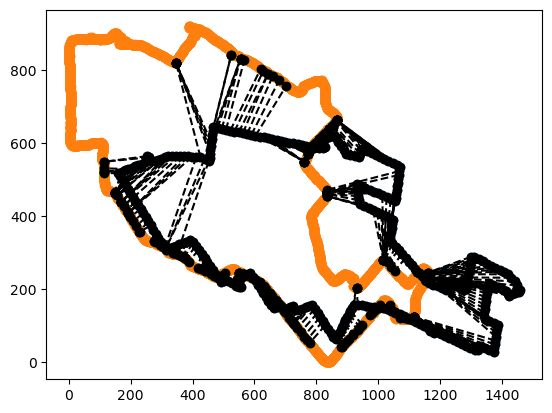

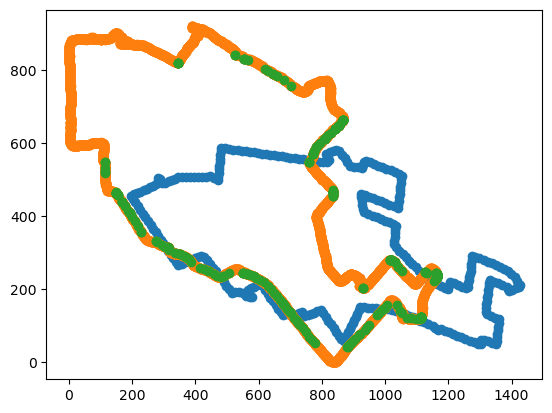

  0%|          | 0/325 [00:00<?, ?it/s]

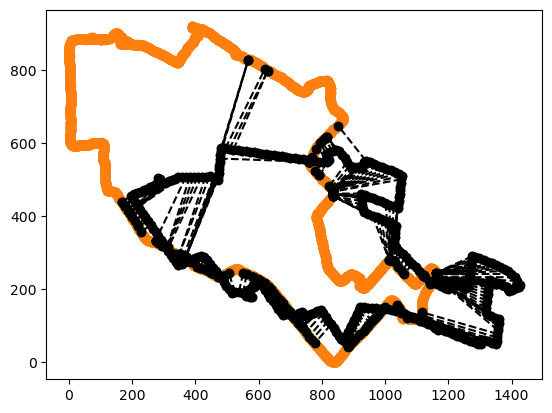

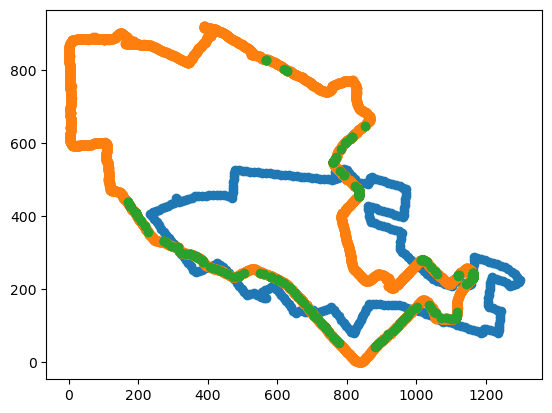

  0%|          | 0/325 [00:00<?, ?it/s]

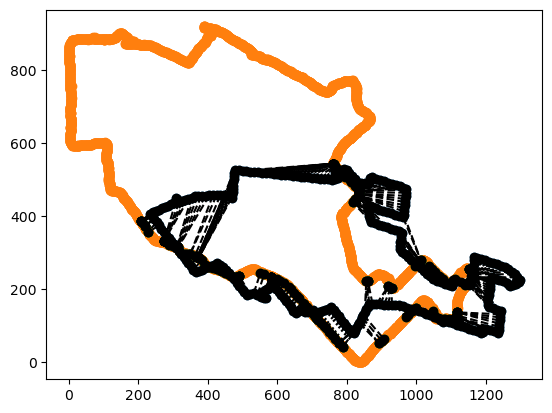

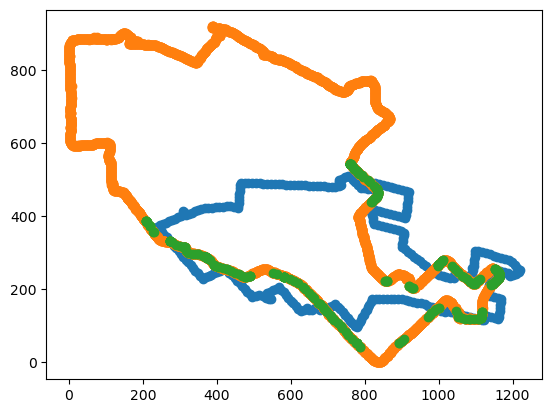

  0%|          | 0/325 [00:00<?, ?it/s]

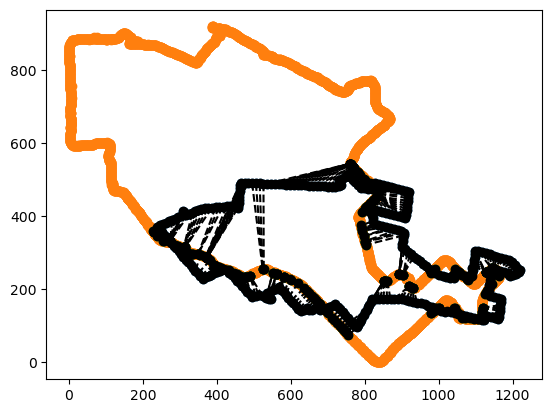

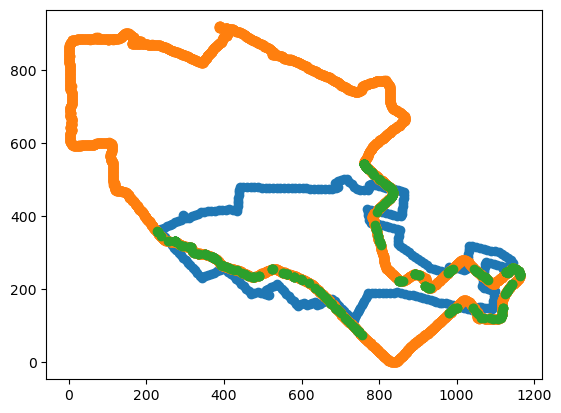

  0%|          | 0/325 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
verbose = True

TPNN = None
RLNN = None
CLNN = None
TLNN = None

for i, row in index_files.iterrows():
    print(row["FilePath"])
    
    filename = os.path.basename(row["FilePath"])
    
    # READ FILES AND CONVERT TO GRAYSCALE
    image = cv2.imread(row["FilePath"])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_arry = np.asarray(image)
    
    # SAVE IMAGE TO OUTPUT DIRECTORY
    output_image = os.path.join(outputs_dir, filename)
    copyfile(row["FilePath"], output_image)
    
    # RUN IMAGES THROUGH DNNs
    classifications, TPNN  = findKeypoints(image, model=TPNN)
    effectiveArea, RLNN    = findSquares(image, model=RLNN)
    countyArea, CLNN       = findCounty(image, model=CLNN)
    tiles, TLNN            = findTiles(row["FilePath"], model=TLNN)

    # GET BOUNDARY POINTS FROM RESPECTIVE SHAPEFILE
    point_boundary_gdf, shp_bounds = getBoundaryPoints(row, distance=100)
    
    if point_boundary_gdf is None:
        continue
    
    # WHAT ARE WE LOOKING FOR IN EACH IDENTIFIED SQUARE?
    key = findKey(row["Basename"])    
    if key is None:
        print(f"Could not find key in {filename}")
    
    # FIND GENERAL BOUNDS FOR 
    bounds_panels = tiles["county"]["bbox"]# find_bbox_yolo(tiles)
    
    print("Assigning Points")
    # INITIAL TRANSFORM
    from_points   = np.array([[bounds_panels[0], bounds_panels[1]], 
                   [bounds_panels[0], bounds_panels[3]],
                   [bounds_panels[2], bounds_panels[1]],
                   [bounds_panels[2], bounds_panels[3]]])

    to_points = np.array([[shp_bounds[0], shp_bounds[1]], 
                   [shp_bounds[0], shp_bounds[3]],
                   [shp_bounds[2], shp_bounds[1]],
                   [shp_bounds[2], shp_bounds[3]]])

    initial_transform = cv2.findHomography(from_points, to_points, cv2.RANSAC, 1000)
    original_homography = initial_transform[0]
    inverse_transform = np.linalg.inv(original_homography)

    # CONVERT THINNED IMAGE TO POINTS
    thin_image = getCountyBoundaryFromImage(countyArea)
    # cv2.ximgproc.thinning(image_t.astype(np.uint8), thinningType=cv2.ximgproc.THINNING_GUOHALL)
    y, x = np.where(thin_image[::-1, :])                   # GET COORDINATES OF EVERY 
    image_points = np.vstack((x, y, np.ones(x.shape)))     # STACK X, Y, AND Z COORDINATES
    # outputs = original_homography @ image_points           # TRANSFORM COORDINATES USING ESTIMATES
    
    # TRANSFORM SHAPEFILE POINTS INTO IMAGE COORDINATE SYSTEM
    point_geometry = [[point.geometry.x, point.geometry.y, 1] for i, point in point_boundary_gdf.iterrows()]
    point_geometry = inverse_transform @ np.array(point_geometry).T
    
    # COORDINATE HANDLING
    coords_shp = point_geometry.T
    coords_ras = np.vstack((image_points[0, :], image_points[1, :], np.ones(image_points[1, :].shape))).T
    
    # IMAGE ORIGIN COORDINATE SYSTEM TO IMAGE CENTER COORDINATE SYSTEM
    offsets = np.min(coords_ras, axis=0)
    x_offset = offsets[0]
    y_offset = offsets[1]

    def translation_matrix(x, y, z=1):
        matrix = np.array([[1, 0, x],
                           [0, 1, y],
                           [0, 0, z]])
        return matrix
    
    # TRANSLATION VECTOR
    offset_matrix = translation_matrix(x_offset, y_offset)

    coords_shp_proc_bl = np.vstack((coords_shp[:, 0] - x_offset, coords_shp[:, 1] - y_offset)).T
    coords_ras_proc_bl = np.vstack((coords_ras[:, 0] - x_offset, coords_ras[:, 1] - y_offset)).T
    
    plt.scatter(coords_shp_proc_bl[:, 0], coords_shp_proc_bl[:, 1])
    plt.scatter(coords_ras_proc_bl[:, 0], coords_ras_proc_bl[:, 1])
    plt.show()
    
    # FAST SEARCH STRUCTURE
    kdtree     = cKDTree(coords_ras_proc_bl)
    
    # ITERATIVE CLOSEST POINT
    reprojected_points = []
    compounded_homography = np.eye(3)
    proc_points = coords_shp_proc_bl
    
    rotation=True
    shear=False
    perspective=False
    
    plot=True
    
    transforms = []
    grades     = []

    # ITERATE
    for i in tqdm(range(50), disable=True):
        
        _, nearest_indices = kdtree.query(proc_points)
        to_points = np.array([coords_ras_proc_bl[idx] for idx in nearest_indices])
        
        # TAKE ADJUSTMENT STEP
        new_homography = adjustStep_affine(proc_points, coords_ras_proc_bl, kdtree,
                                        shear=shear, rotation=rotation, perspective=perspective)
        
        if plot:
            fig, ax = plt.subplots()
            ax.scatter(proc_points[:, 0], proc_points[:, 1])
            ax.scatter(coords_ras_proc_bl[:, 0], coords_ras_proc_bl[:, 1])
            ax.scatter(to_points[:, 0], to_points[:, 1])

            for i in tqdm(range(proc_points.shape[0])):
                # print(proc_points[i, 0], proc_points[i, 1], to_points[i, 0], to_points[i, 1])
                plt.plot([proc_points[i, 0], to_points[i, 0]],
                         [proc_points[i, 1], to_points[i, 1]], 'ko', linestyle="--")
            plt.show()
        
        transform = new_homography.copy()
        
        # APPLY TRANSFORM FROM ADJUSTMENT TO PROCESSING POINTS AND APPEND TO LIST
        reprojected_points.append(applyTransform(transform, proc_points))
        
        proc_points = applyTransform(transform, proc_points)
        if plot:
            plt.scatter(proc_points[:, 0], proc_points[:, 1])
            plt.scatter(coords_ras_proc_bl[:, 0], coords_ras_proc_bl[:, 1])
            plt.scatter(to_points[:, 0], to_points[:, 1])
            plt.show()
            
        # COMPOUND TRANSFORMATION
        compounded_homography = compounded_homography @ transform
        
        transforms.append(compounded_homography)
        
        def gradeFit(pts1, kdtree):
            dist, _ = kdtree.query(pts1)
            return np.sqrt(np.sum(dist ** 2))
        
        grades.append(gradeFit(proc_points, kdtree))
        
        
        if i % 1 == 0:
            scale  = np.sqrt((new_homography[0, 0] ** 2 + new_homography[1, 1] ** 2) / 2)
            offset = np.sqrt((new_homography[1, 2] ** 2 + new_homography[0, 2] ** 2) / 2)
            # print(f"Scale: {scale:.2f} Offset: {offset:.2f}")
    
    best_transform = transforms[np.argmin(grades)]
    best_points    = reprojected_points[np.argmin(grades)]
    
    if plot:
        plt.plot(range(len(grades)), grades)
        plt.scatter(np.argmin(grades), grades[np.argmin(grades)])
        plotICP(reprojected_points, plot_skip=10, )
        plt.show()
    
    # REVERSE Y AXIS
    rev_y_axis = np.array([[1, 0, 0],
                           [0,-1, 0],
                           [0, 0, 1]])

    # move = original_homography @ np.array([0, image_t.shape[0], 0])
    translation = np.eye(3)
    translation[1, 2] = image_arry.shape[0]
    
    # adjustment = asymetric_adjustment @ symetric_adjustment
    adjustment =  np.linalg.inv(best_transform.copy())

    # rev_adj = rev_y_axis @ adjustment
    rev_adj = adjustment.copy()
    rev_adj[1, 1] = rev_adj[1, 1] * -1
    
    output_transform = original_homography @ translation @ rev_adj
    # output_transform[1, 1] = output_transform[1, 1] * -1
    offsets = output_transform @ np.array([[0, 0, 1], [image.shape[0], 0, 1]]).T
    print(offsets)
    offsets = offsets[:, 1] - offsets[:, 0]
    # output_transform[0, 1] = -1 * output_transform[0, 1]

    print(output_transform)
    output_affine = Affine(*output_transform.flatten()[:6])
    write_world_file_from_affine(output_affine, get_world_file_path(output_image))
    error

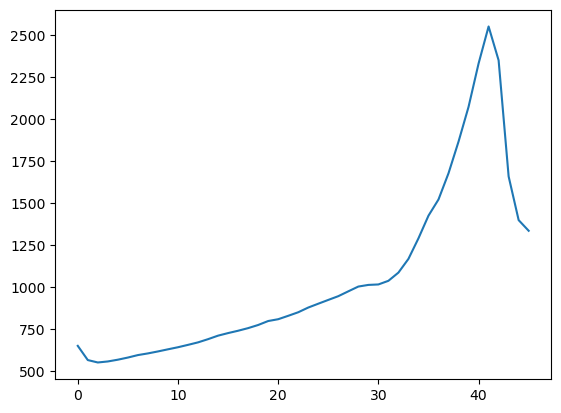

In [20]:
plt.plot(grades)

In [21]:
np.argmin(grades)

2

In [ ]:
plt.scatter(best_points[:, 0], best_points[:, 1], s=1)
plt.scatter(coords_ras_proc_bl[:, 0], coords_ras_proc_bl[:, 1], s=1)